<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('states_edu.csv')

Chosen test: **<hit `Enter` to edit>**
Math for 8th grade

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
#lists columns
list(df)

['PRIMARY_KEY',
 'STATE',
 'YEAR',
 'ENROLL',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'TOTAL_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'GRADES_PK_G',
 'GRADES_KG_G',
 'GRADES_4_G',
 'GRADES_8_G',
 'GRADES_12_G',
 'GRADES_1_8_G',
 'GRADES_9_12_G',
 'GRADES_ALL_G',
 'AVG_MATH_4_SCORE',
 'AVG_MATH_8_SCORE',
 'AVG_READING_4_SCORE',
 'AVG_READING_8_SCORE']

In [4]:
#column rename
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_K',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [5]:
#kinda need this to be in the column
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.dropna(subset=['STATE_REVENUE'], inplace=True)

In [6]:
#from tutorial, but yeah this seems useful
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [7]:
df['DINEROS_POR_ESTUDIENTE'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']

In [8]:
df['STATE_LOCAL_RATIO'] = df['STATE_REVENUE'] / df['LOCAL_REVENUE']  

Final feature list: **<LIST FEATURES HERE\>** Expenditures per student and state-local ratio 

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**
Expenditure per student: Expenditures per student is kinda just needed as a population control  
STATE_LOCAL_RATIO: Testing to see if a higher ratio of state-local funding makes a difference


<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, '8th grade math score over time')

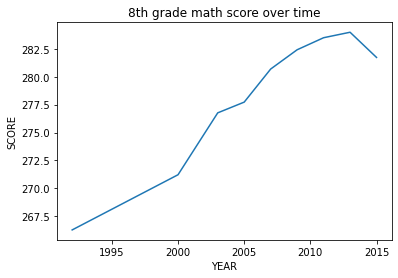

In [9]:
df.groupby('YEAR').AVG_MATH_8_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('8th grade math score over time')

**<CAPTION FOR VIZ 1>**

Visualization 2

Text(0.5, 1.0, 'Comparison of 4th vs 8th grade scores')

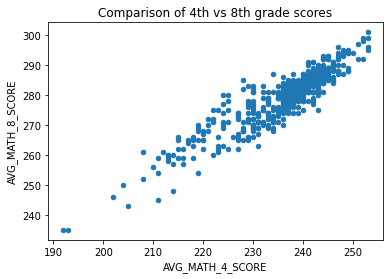

In [10]:
df.plot.scatter(x='AVG_MATH_4_SCORE',y='AVG_MATH_8_SCORE')
plt.title('Comparison of 4th vs 8th grade scores')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['YEAR', 'DINEROS_POR_ESTUDIENTE', 'STATE_LOCAL_RATIO']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [13]:
#
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [14]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [15]:
# create your model here
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print(model.intercept_)
print(model.coef_)

-520.3326447677879
[ 0.39447176  0.75217361 -0.20697234]


In [18]:
model.score(X_test, y_test)

0.38855144200202163

In [19]:
y_pred = model.predict(X_test)

In [20]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'TOTAL_REVENUE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')

KeyError: 'TOTAL_REVENUE'

<h2> Classification </h2>

In [22]:
y = df.loc[X.index]['AVG_MATH_8_SCORE']>250

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

In [24]:
from sklearn.svm import LinearSVC

In [51]:
model = LinearSVC(random_state=0)

In [52]:
model.fit(X_train, y_train)

/home/joe/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(random_state=0)

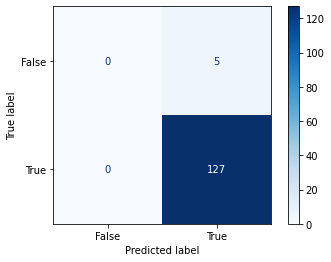

In [53]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

<h2> Summary </h2>

Ran a test on the model with parameters of expenditure per student a ratio of local-state funding, and year, r^2 was .37. Not an especially high value, and is also possibly skewed by a relatively linear relationship between year and Grade 8 Math scores as seen in the exploratory graphs. Ratio of local-state funding proved a bad predictor but time(YEAR) and expenditures per student both had much more noticeable r^2 values.

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**